# COSIMA hack sandbox

In [1]:
Author1 = {"name": "Thomas Moore", "affiliation": "CSIRO", "email": "thomas.moore@csiro.au", "orcid": "0000-0003-3930-1946"}

In [2]:
%load_ext watermark
%watermark -a 'Thomas Moore' -gu '@Thomas-Moore-Creative' -e 'thomas.moore@csiro.au' -u -n -t -z -h -co -p xarray,dask,distributed

Author: Thomas Moore

Github username: @Thomas-Moore-Creative

Email: thomas.moore@csiro.au

Last updated: Tue Jan 24 2023 10:41:05AEDT

xarray     : 2022.11.0
dask       : 2022.11.1
distributed: 2022.11.1

conda environment: analysis3-22.07

Hostname: gadi-cpu-bdw-0013.gadi.nci.org.au



# NCI ARE - localcluster

## processing platform is NCI ARE
https://opus.nci.org.au/display/Help/ARE+User+Guide

In [3]:
from dask.distributed import Client, LocalCluster
cluster = LocalCluster()
client = Client(cluster)

In [4]:
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 2
Total threads: 2,Total memory: 9.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:40261,Workers: 2
Dashboard: /proxy/8787/status,Total threads: 2
Started: Just now,Total memory: 9.00 GiB
Comm: tcp://127.0.0.1:40643,Total threads: 1
Dashboard: /proxy/36605/status,Memory: 4.50 GiB
Nanny: tcp://127.0.0.1:33639,


In [5]:
# Reading in data

# Data manipulation
import xarray as xr
import dask.array as dsa
import numpy as np
import scipy
import pandas as pd


# Visualization
import matplotlib.pyplot as plt

# in-line images from local machine or the web
from IPython.display import Image
from IPython.core.display import HTML 

# autocomplete fix
%config Completer.use_jedi = False

import cosima_cookbook as cc

In [6]:
session = cc.database.create_session()
temp = cc.querying.getvar('1deg_jra55_iaf_omip2_cycle6' ,'temp', session)

In [7]:
temp

<xarray.DataArray 'temp' (time: 732, st_ocean: 50, yt_ocean: 300, xt_ocean: 360)>
dask.array<concatenate, shape=(732, 50, 300, 360), dtype=float32, chunksize=(1, 25, 150, 180), chunktype=numpy.ndarray>
Coordinates:
  * xt_ocean  (xt_ocean) float64 -279.5 -278.5 -277.5 -276.5 ... 77.5 78.5 79.5
  * yt_ocean  (yt_ocean) float64 -77.88 -77.63 -77.38 ... 88.87 89.32 89.77
  * time      (time) datetime64[ns] 1958-01-14T12:00:00 ... 2018-12-14T12:00:00
  * st_ocean  (st_ocean) float64 1.152 3.649 6.565 ... 5.034e+03 5.254e+03
Attributes:
    long_name:      Conservative temperature
    units:          K
    valid_range:    [-10. 500.]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    coordinates:    geolon_t geolat_t
    standard_name:  sea_water_conservative_temperature
    ncfiles:        ['/g/data/ik11/outputs/access-om2/1deg_jra55_iaf_omip2_cy...
    contact:        Hakase Hayashida
    email:          hakase.hayashida@utas.edu.au
    created:        2021-03-03
    description:    1 degree ACCESS-OM2 global model configuration under inte...

---

# use CC `explore`

In [10]:
from cosima_cookbook import explore
dbx = explore.DatabaseExplorer(session=session)
dbx

DatabaseExplorer(children=(HTML(value='<style>.header p{ line-height: 1.4; margin-bottom: 10px }</style>\n    …

In [11]:
data = cc.querying.getvar(expt='1deg_jra55_iaf_omip2_cycle1', variable='temp', 
                          session=session, frequency='1 monthly',
                          attrs={'cell_methods': 'time: mean'},
                          start_time='1957-12-31 00:00:00', 
                          end_time='2018-11-30 00:00:00')

In [12]:
data

<xarray.DataArray 'temp' (time: 732, st_ocean: 50, yt_ocean: 300, xt_ocean: 360)>
dask.array<concatenate, shape=(732, 50, 300, 360), dtype=float32, chunksize=(1, 25, 150, 180), chunktype=numpy.ndarray>
Coordinates:
  * xt_ocean  (xt_ocean) float64 -279.5 -278.5 -277.5 -276.5 ... 77.5 78.5 79.5
  * yt_ocean  (yt_ocean) float64 -77.88 -77.63 -77.38 ... 88.87 89.32 89.77
  * time      (time) datetime64[ns] 1958-01-14T12:00:00 ... 2018-12-14T12:00:00
  * st_ocean  (st_ocean) float64 1.152 3.649 6.565 ... 5.034e+03 5.254e+03
Attributes:
    long_name:      Conservative temperature
    units:          K
    valid_range:    [-10. 500.]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    coordinates:    geolon_t geolat_t
    standard_name:  sea_water_conservative_temperature
    ncfiles:        ['/g/data/ik11/outputs/access-om2/1deg_jra55_iaf_omip2_cy...
    contact:        Hakase Hayashida
    email:          hakase.hayashida@utas.edu.au
    created:        2021-03-03
    description:    1 degree ACCESS-OM2 global model configuration under inte...

In [13]:
data.plot()

2023-01-24 10:25:08,658 - distributed.worker_memory - WARNING - Worker is at 84% memory usage. Pausing worker.  Process memory: 3.86 GiB -- Worker memory limit: 4.57 GiB
2023-01-24 10:25:12,933 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 3.38 GiB -- Worker memory limit: 4.57 GiB
2023-01-24 10:25:13,026 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 3.36 GiB -- Worker memory limit: 4.57 GiB
2023-01-24 10:25:13,126 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory lea

# LOAD in a random COSIMA grid file

In [8]:
grid_file = '/g/data/cj50/access-om2/cf-compliant/access-om2/v20171212/1deg_jra55v13_ryf0304_RCP45/output150/ocean/ocean_grid.nc'

In [9]:
COSIMA_grid = xr.open_dataset(grid_file)

In [10]:
COSIMA_grid

<xarray.Dataset>
Dimensions:     (xt_ocean: 360, yt_ocean: 300, time: 1, xu_ocean: 360,
                 yu_ocean: 300)
Coordinates:
  * xt_ocean    (xt_ocean) float64 -279.5 -278.5 -277.5 ... 77.5 78.5 79.5
  * yt_ocean    (yt_ocean) float64 -77.88 -77.63 -77.38 ... 88.87 89.32 89.77
  * time        (time) object 0303-01-01 00:00:00
  * xu_ocean    (xu_ocean) float64 -279.0 -278.0 -277.0 ... 78.0 79.0 80.0
  * yu_ocean    (yu_ocean) float64 -77.75 -77.51 -77.26 ... 89.1 89.55 90.0
    geolon_t    (yt_ocean, xt_ocean) float32 ...
    geolat_t    (yt_ocean, xt_ocean) float32 ...
    geolon_c    (yu_ocean, xu_ocean) float32 ...
    geolat_c    (yu_ocean, xu_ocean) float32 ...
Data variables:
    ht          (yt_ocean, xt_ocean) float32 ...
    hu          (yu_ocean, xu_ocean) float32 ...
    dxt         (yt_ocean, xt_ocean) float32 ...
    dyt         (yt_ocean, xt_ocean) float32 ...
    dxu         (yu_ocean, xu_ocean) float32 ...
    dyu         (yu_ocean, xu_ocean) float32 ...
    area_t      (yt_ocean, xt_ocean) float32 ...
    area_u      (yu_ocean, xu_ocean) float32 ...
    kmt         (yt_ocean, xt_ocean) float32 ...
    kmu         (yu_ocean, xu_ocean) float32 ...
    drag_coeff  (time, yu_ocean, xu_ocean) float32 ...
Attributes: (12/24)
    filename:            ocean_grid.nc
    grid_type:           mosaic
    grid_tile:           1
    Conventions:         CF-1.6, ACDD-1.3
    summary:             Ocean grid variables from ACCESS-OM2 1 degree RCP45 ...
    title:               COSIMA model output: ACCESS-OM2 1 degrees experiment...
    ...                  ...
    publisher_name:      ARCCSS data manager
    publisher_email:     paola.petrelli@utas.edu.au
    geospatial_lat_min:  -78.0
    geospatial_lat_max:  90.0
    geospatial_lon_min:  -180.0
    geospatial_lon_max:  180.0

# LOAD CAFE `grid spec` file

In [11]:
CAFE_grid_spec_file = '/g/data/xv83/users/tm4888/data/CAFE/grid_spec.auscom.20110118.nc'
CAFE_grid_spec = xr.open_dataset(CAFE_grid_spec_file)

In [12]:
CAFE_grid_spec

<xarray.Dataset>
Dimensions:        (zt: 50, zb: 50, grid_x_T: 360, grid_y_T: 300,
                    grid_x_C: 360, grid_y_C: 300, vertex: 4, i_atmXocn: 111817,
                    i_atmXlnd: 5285, i_lndXocn: 111817, xba: 145, yba: 91,
                    xta: 144, yta: 90, xbl: 145, ybl: 91, xtl: 144, ytl: 90,
                    xto: 360, yto: 300)
Coordinates: (12/17)
  * zt             (zt) float32 5.0 15.0 25.0 ... 5.166e+03 5.499e+03 5.831e+03
  * zb             (zb) float32 10.0 20.0 30.0 ... 5.333e+03 5.665e+03 6e+03
  * grid_x_T       (grid_x_T) float32 -279.5 -278.5 -277.5 ... 77.5 78.5 79.5
  * grid_y_T       (grid_y_T) float32 -77.88 -77.63 -77.38 ... 88.87 89.32 89.77
  * grid_x_C       (grid_x_C) float32 -279.0 -278.0 -277.0 ... 78.0 79.0 80.0
  * grid_y_C       (grid_y_C) float32 -77.75 -77.51 -77.26 ... 89.1 89.55 90.0
    ...             ...
  * xbl            (xbl) float64 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5 360.0
  * ybl            (ybl) float64 -90.0 -88.0 -86.0 -84.0 ... 84.0 86.0 88.0 90.0
  * xtl            (xtl) float64 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * ytl            (ytl) float64 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * xto            (xto) float64 9.969e+36 9.969e+36 ... 9.969e+36 9.969e+36
  * yto            (yto) float64 9.969e+36 9.969e+36 ... 9.969e+36 9.969e+36
Dimensions without coordinates: i_atmXocn, i_atmXlnd, i_lndXocn
Data variables: (12/124)
    x_T            (grid_y_T, grid_x_T) float64 ...
    y_T            (grid_y_T, grid_x_T) float64 ...
    x_vert_T       (vertex, grid_y_T, grid_x_T) float64 ...
    y_vert_T       (vertex, grid_y_T, grid_x_T) float64 ...
    area_T         (grid_y_T, grid_x_T) float64 ...
    angle_T        (grid_y_T, grid_x_T) float64 ...
    ...             ...
    I_OCN_LNDxOCN  (i_lndXocn) int32 ...
    J_OCN_LNDxOCN  (i_lndXocn) int32 ...
    AREA_ATM       (yta, xta) float64 ...
    AREA_LND       (ytl, xtl) float64 ...
    AREA_LND_CELL  (ytl, xtl) float64 ...
    AREA_OCN       (yto, xto) float64 ...
Attributes: (12/16)
    filename:             edit_grid.20110118.nc
    xname:                longitude
    yname:                latitude
    vertex_convention:    SWCCW
    join_lat:             65.0
    y_boundary_type:      fold_north_edge
    ...                   ...
    fill_isolated_cells:  y
    fill_first_row:       y
    deepen_shallow:       y
    adjust_topo:          y
    filter_topog:         y
    num_filter_pass:      1.0

## Load in `access-om2-01/v20191202/jra55v13_iaf`

In [6]:
path = '/g/data/cj50/access-om2/cf-compliant/access-om2-01/v20191202/jra55v13_iaf/ocean/temp/'

In [7]:
%%time
OM2_01_temp_DS = xr.open_mfdataset(path+'*',parallel=True)

CPU times: user 19.7 s, sys: 11.1 s, total: 30.8 s
Wall time: 1min 16s


In [10]:
OM2_01_temp_DS.temp

<xarray.DataArray 'temp' (time: 396, st_ocean: 75, yt_ocean: 2700,
                          xt_ocean: 3600)>
dask.array<concatenate, shape=(396, 75, 2700, 3600), dtype=float32, chunksize=(6, 75, 2700, 3600), chunktype=numpy.ndarray>
Coordinates:
  * time      (time) datetime64[ns] 1985-01-16T12:00:00 ... 2017-12-16T12:00:00
    geolon_t  (yt_ocean, xt_ocean) float32 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    geolat_t  (yt_ocean, xt_ocean) float32 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
  * xt_ocean  (xt_ocean) float64 -279.9 -279.8 -279.7 ... 79.75 79.85 79.95
  * yt_ocean  (yt_ocean) float64 -81.11 -81.07 -81.02 ... 89.89 89.94 89.98
  * st_ocean  (st_ocean) float64 0.5413 1.681 2.94 ... 5.511e+03 5.709e+03
Attributes:
    long_name:      Potential temperature
    units:          degrees K
    valid_range:    [-10. 500.]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    standard_name:  sea_water_potential_temperature

In [9]:
OM2_01_temp_DS.temp.isel(time=390).isel(st_ocean=0)

<xarray.DataArray 'temp' (yt_ocean: 2700, xt_ocean: 3600)>
dask.array<getitem, shape=(2700, 3600), dtype=float32, chunksize=(2700, 3600), chunktype=numpy.ndarray>
Coordinates:
    time      datetime64[ns] 2017-07-16T12:00:00
    geolon_t  (yt_ocean, xt_ocean) float32 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    geolat_t  (yt_ocean, xt_ocean) float32 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
  * xt_ocean  (xt_ocean) float64 -279.9 -279.8 -279.7 ... 79.75 79.85 79.95
  * yt_ocean  (yt_ocean) float64 -81.11 -81.07 -81.02 ... 89.89 89.94 89.98
    st_ocean  float64 0.5413
Attributes:
    long_name:      Potential temperature
    units:          degrees K
    valid_range:    [-10. 500.]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    standard_name:  sea_water_potential_temperature

In [11]:
data = OM2_01_temp_DS.temp.isel(time=390).isel(st_ocean=0).compute()

Exception ignored in: <function CachingFileManager.__del__ at 0x150f24f43ac0>
Traceback (most recent call last):
  File "/g/data/v14/tm4888/miniconda3/envs/pangeo-2022/lib/python3.10/site-packages/xarray/backends/file_manager.py", line 246, in __del__
    self.close(needs_lock=False)
  File "/g/data/v14/tm4888/miniconda3/envs/pangeo-2022/lib/python3.10/site-packages/xarray/backends/file_manager.py", line 224, in close
    file.close()
  File "src/netCDF4/_netCDF4.pyx", line 2624, in netCDF4._netCDF4.Dataset.close
  File "src/netCDF4/_netCDF4.pyx", line 2587, in netCDF4._netCDF4.Dataset._close
  File "src/netCDF4/_netCDF4.pyx", line 2028, in netCDF4._netCDF4._ensure_nc_success
RuntimeError: NetCDF: Not a valid ID


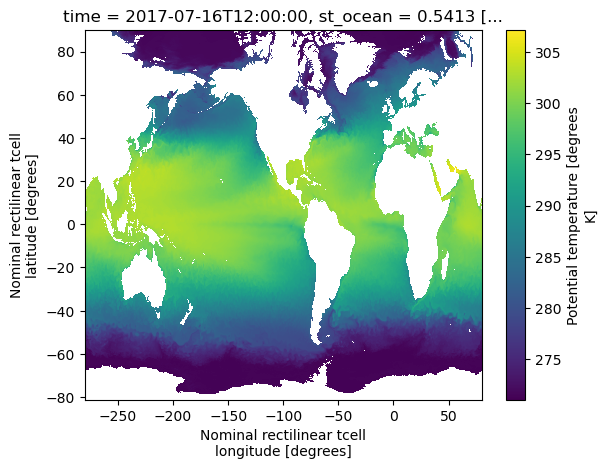

In [13]:
data.plot()

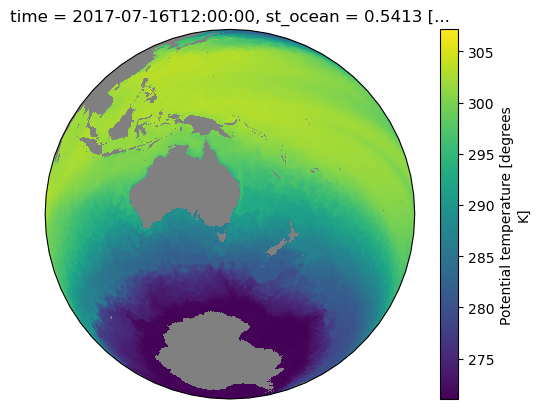

In [14]:
import cartopy.crs as ccrs
p = data.plot( subplot_kws=dict(projection=ccrs.Orthographic(150, -35), facecolor="gray"), transform=ccrs.PlateCarree())

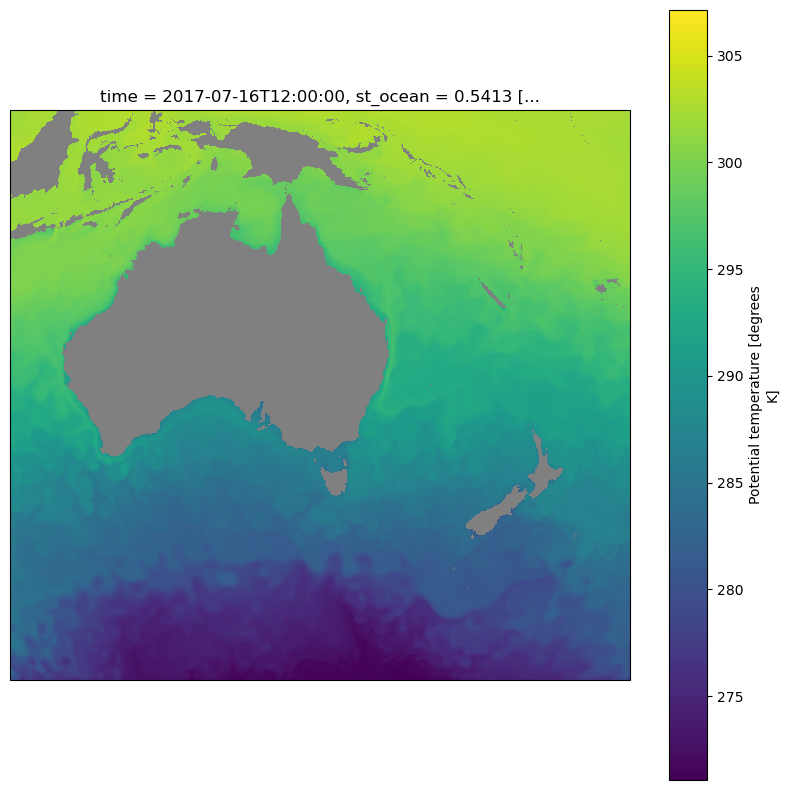

In [20]:
import cartopy.crs as ccrs
p = data.plot( subplot_kws=dict(projection=ccrs.Orthographic(150, -35), facecolor="gray"), transform=ccrs.PlateCarree(),aspect=1, size=10)
ax =plt.gca()
ax.set_extent([110, 180, -60, 0])

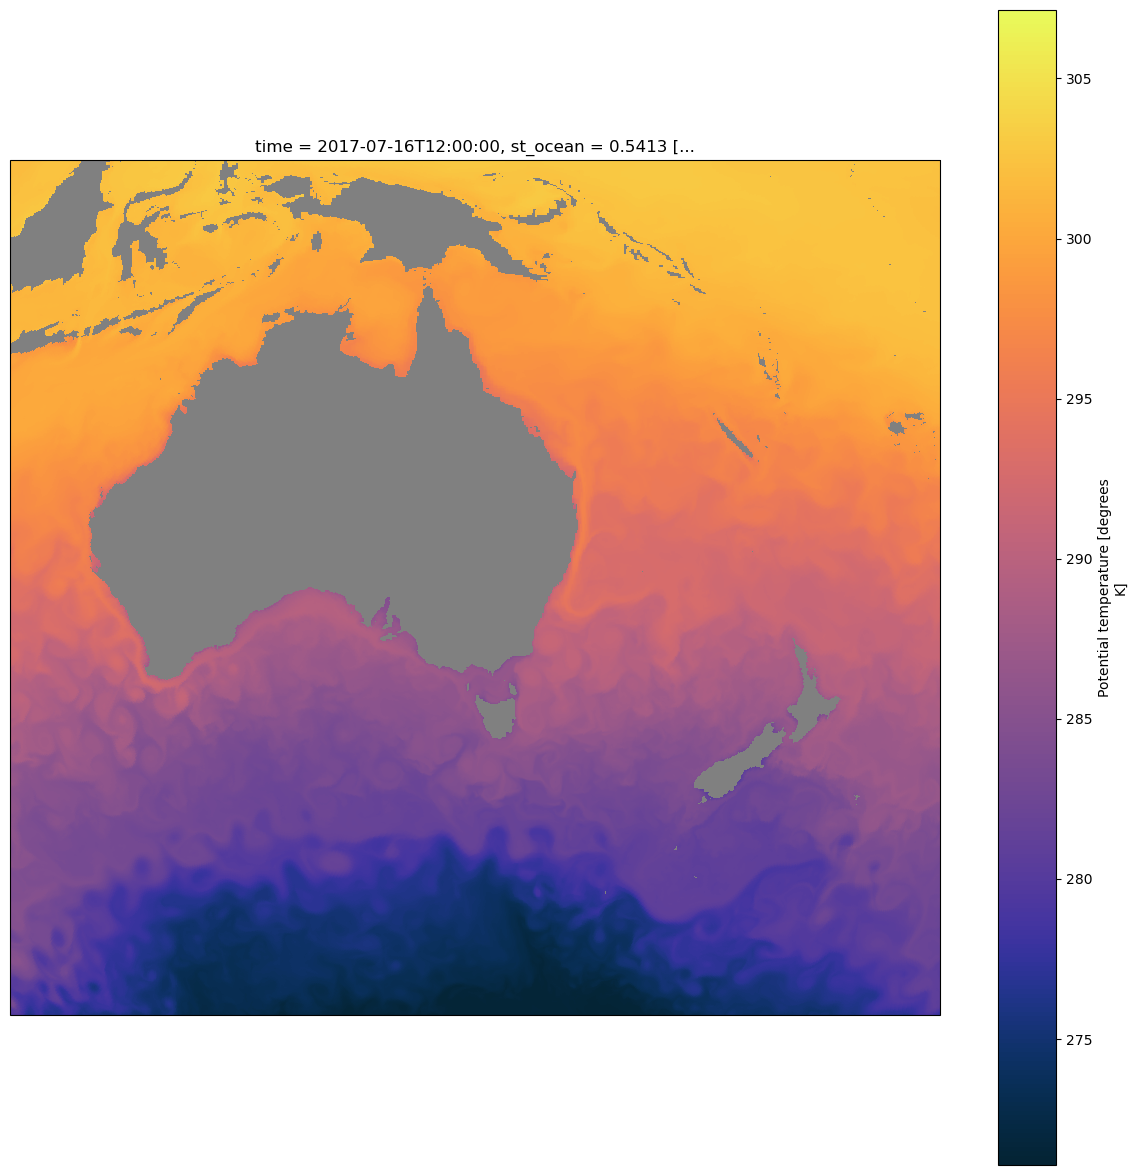

In [22]:
import cmocean
import cartopy.crs as ccrs
p = data.plot( subplot_kws=dict(projection=ccrs.Orthographic(150, -35), facecolor="gray"), transform=ccrs.PlateCarree(),aspect=1, size=15,cmap=cmocean.cm.thermal)
ax =plt.gca()
ax.set_extent([110, 180, -60, 0])

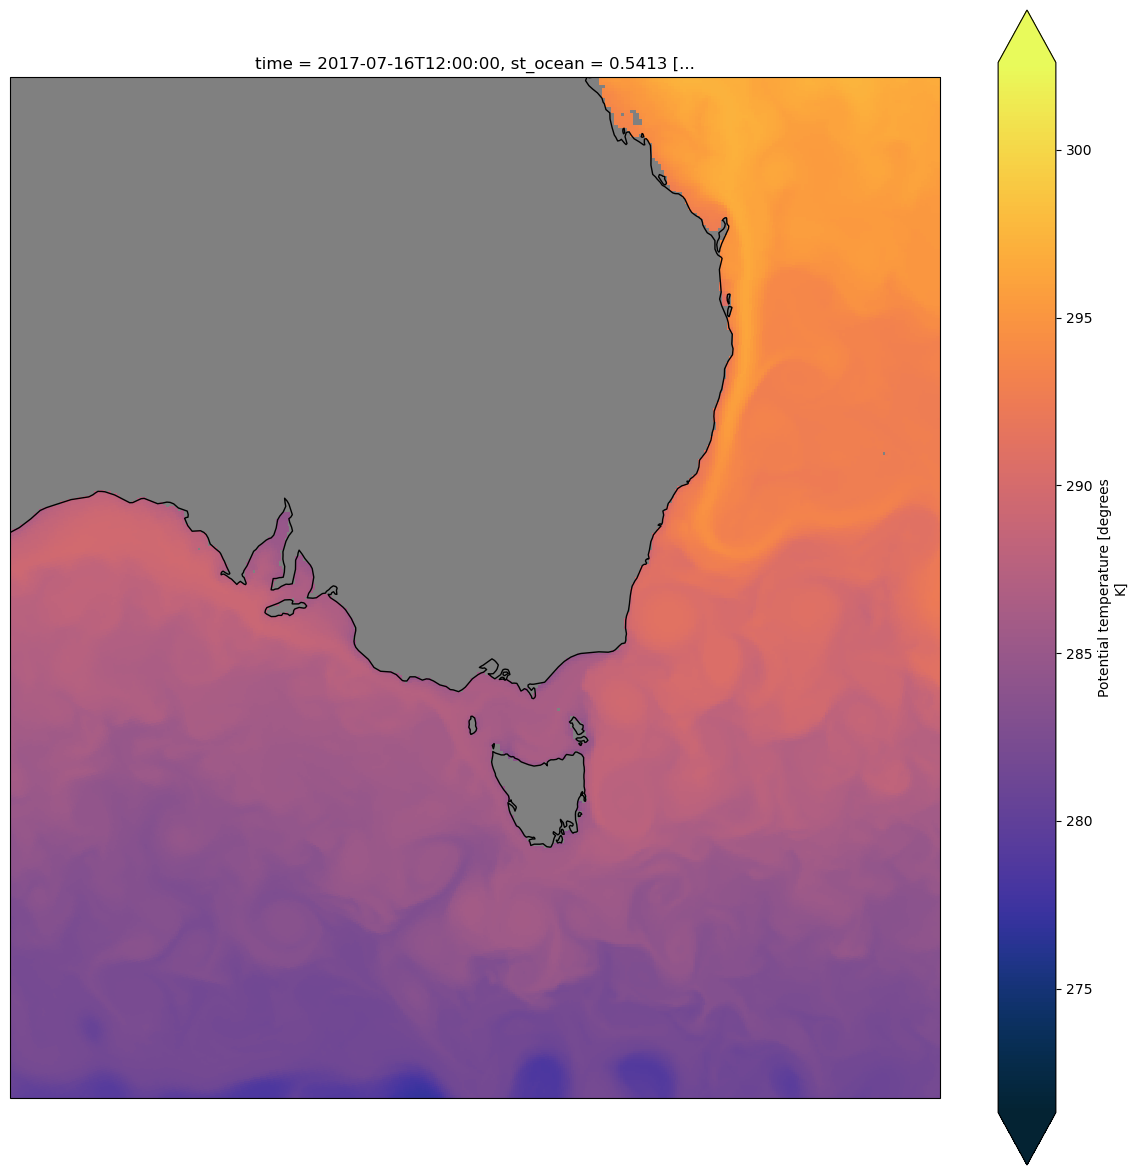

In [25]:
import cmocean
import cartopy.crs as ccrs
p = data.plot( subplot_kws=dict(projection=ccrs.Orthographic(150, -35), facecolor="gray"), transform=ccrs.PlateCarree(),aspect=1, size=15,cmap=cmocean.cm.thermal,robust=True)
ax = plt.gca()
ax.set_extent([130, 160, -50, -20])
ax.coastlines()

In [26]:
client.shutdown()